In [62]:
import pandas as pd   #importing pandas
import numpy as np    #importing numpy
import glob           #importing glob
import matplotlib.pyplot as plt     #importing matplotlib
import seaborn as sns               #importing seaborn
import opencage.geocoder           #for maps
import folium       #for maps
import plotly.express as px     #for maps

In [21]:
path = 'C:/Users/vaish/Downloads/homeless_csv/'       #this path contains all the csv files
all_files = glob.glob(path + '/*.csv')               #its taking all the files with csv extension

In [22]:
all_dfs = []  #empty list to store all the dataframes

for csv_file in all_files:
    file_name = csv_file.split('/')[-1]    #extracting the year and month from the file name
    year, month = file_name.split('-')[:2]   #extracting the year and month from the file name
    # print('Year:', year)
    # print('Month:', month)
    df = pd.read_csv(csv_file)     # Read the CSV file into a pandas dataframe
    df.insert(0, 'Period', month + '-' + year[-2:])         # Add the 'Period' column to the dataframe
    all_dfs.append(df)      # Append the dataframe to the dfs list

In [23]:

#New Column names for the data
column_names = ['Period', 'Region', 'Homeless Adults', 'Male', 'Female', 'Ages18_24', 'Ages25_44', 'Ages45_64', 'Ages65Up', 'PEA', 'STA', 'TEA', 'Other', 'TotalFamilies', 'DependentChild']

# looping over the DataFrames to rename the columns
for df in all_dfs:
    df.rename(columns=dict(zip(df.columns, column_names)), inplace=True)    #rename columns from the list


In [24]:
merged_df = pd.concat(all_dfs, ignore_index=True)   #concatenated all gthe created dataframes

In [25]:
merged_df   #printing new merged dataframe

,Period,Region,Homeless Adults,Male,Female,Ages18_24,Ages25_44,Ages45_64,Ages65Up,PEA,STA,TEA,Other,TotalFamilies,DependentChild,Unnamed: 14,Unnamed: 15
0,01-16,Dublin,2678.0,1490,1188,462,1678,498,40.0,1405,1240,72,0,769,1570,NaN,NaN
1,01-16,Mid-East,179.0,119,60,23,109,36,11.0,51,81,47,0,21,53,NaN,NaN
2,01-16,Midlands,43.0,25,18,11,19,13,0.0,7,0,36,0,13,25,NaN,NaN
3,01-16,Mid-West,221.0,152,69,27,128,55,11.0,11,196,11,3,14,31,NaN,NaN
4,01-16,North-East,57.0,42,15,11,30,13,3.0,25,32,2,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,12-22,North-East,148,93,55,24,83,34,7.0,70,77,2,0,31,65,NaN,NaN
781,12-22,North-West,114,73,41,17,67,26,4.0,63,35,16,0,12,27,NaN,NaN
782,12-22,South-East,231,165,66,36,131,57,7.0,57,176,0,0,14,24,NaN,NaN
783,12-22,South-West,564,372,192,77,299,174,14.0,353,212,0,0,79,148,NaN,NaN


In [26]:
merged_df['Unnamed: 15'].isnull().sum()   #has all the null values
merged_df['Unnamed: 14'].isnull().sum()   #has all the null values

785

In [27]:
merged_df = merged_df.drop('Unnamed: 14', axis=1)    #dropping column
merged_df = merged_df.drop('Unnamed: 15', axis=1)    #dropping column
merged_df

,Period,Region,Homeless Adults,Male,Female,Ages18_24,Ages25_44,Ages45_64,Ages65Up,PEA,STA,TEA,Other,TotalFamilies,DependentChild
0,01-16,Dublin,2678.0,1490,1188,462,1678,498,40.0,1405,1240,72,0,769,1570
1,01-16,Mid-East,179.0,119,60,23,109,36,11.0,51,81,47,0,21,53
2,01-16,Midlands,43.0,25,18,11,19,13,0.0,7,0,36,0,13,25
3,01-16,Mid-West,221.0,152,69,27,128,55,11.0,11,196,11,3,14,31
4,01-16,North-East,57.0,42,15,11,30,13,3.0,25,32,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,12-22,North-East,148,93,55,24,83,34,7.0,70,77,2,0,31,65
781,12-22,North-West,114,73,41,17,67,26,4.0,63,35,16,0,12,27
782,12-22,South-East,231,165,66,36,131,57,7.0,57,176,0,0,14,24
783,12-22,South-West,564,372,192,77,299,174,14.0,353,212,0,0,79,148


EXPLORATORY DATA ANALYSIS AND DATA CLEANING

In [28]:
print(merged_df.head())   #print first 5 rows

  Period      Region Homeless Adults  Male Female Ages18_24 Ages25_44  \
0  01-16      Dublin          2678.0  1490   1188       462      1678   
1  01-16    Mid-East           179.0   119     60        23       109   
2  01-16    Midlands            43.0    25     18        11        19   
3  01-16    Mid-West           221.0   152     69        27       128   
4  01-16  North-East            57.0    42     15        11        30   

  Ages45_64  Ages65Up   PEA   STA TEA Other TotalFamilies DependentChild  
0       498      40.0  1405  1240  72     0           769           1570  
1        36      11.0    51    81  47     0            21             53  
2        13       0.0     7     0  36     0            13             25  
3        55      11.0    11   196  11     3            14             31  
4        13       3.0    25    32   2     0             0              0  


In [29]:
merged_df.to_csv('C:/Users/vaish/Downloads/output.csv', index=False)     #exporing the merged dataframe into csv

In [31]:
vaish_df = pd.read_csv('C:/Users/vaish/Downloads/new_file.csv')     #importing new csv file with the merged data

In [34]:
print(vaish_df.isnull().sum())    #to find if there are any null values

Period              0
Region             20
Homeless Adults    20
Male               20
Female             20
Ages18_24          29
Ages25_44          29
Ages45_64          29
Ages65Up           30
PEA                29
STA                29
TEA                29
Other              29
TotalFamilies      29
DependentChild     29
dtype: int64


In [36]:
vaish_df.dropna(inplace=True)     #dropping rows with null values
print(vaish_df.isnull().sum())      #again checking if null values exists   

Period             0
Region             0
Homeless Adults    0
Male               0
Female             0
Ages18_24          0
Ages25_44          0
Ages45_64          0
Ages65Up           0
PEA                0
STA                0
TEA                0
Other              0
TotalFamilies      0
DependentChild     0
dtype: int64


In [37]:
print(vaish_df.dtypes)    #to know the datatypes of the columns

Period              object
Region              object
Homeless Adults    float64
Male               float64
Female             float64
Ages18_24          float64
Ages25_44          float64
Ages45_64          float64
Ages65Up           float64
PEA                float64
STA                float64
TEA                float64
Other              float64
TotalFamilies      float64
DependentChild     float64
dtype: object


In [462]:
# df_all['Homeless Adults'] = pd.to_numeric(df_all['Homeless Adults'].str.replace(',', ''), errors='coerce')
# df_all['Male'] = pd.to_numeric(df_all['Male'].str.replace(',', ''), errors='coerce')
# df_all['Female'] = pd.to_numeric(df_all['Female'].str.replace(',', ''), errors='coerce')
# df_all['PEA'] = pd.to_numeric(df_all['PEA'].str.replace(',', ''), errors='coerce')
# df_all['STA'] = pd.to_numeric(df_all['STA'].str.replace(',', ''), errors='coerce')
# df_all['TEA'] = pd.to_numeric(df_all['TEA'].str.replace(',', ''), errors='coerce')
# df_all['Other'] = pd.to_numeric(df_all['Other'].str.replace(',', ''), errors='coerce')
# df_all['TotalFamilies'] = pd.to_numeric(df_all['TotalFamilies'].str.replace(',', ''), errors='coerce')
# df_all['DependentChild'] = pd.to_numeric(df_all['DependentChild'].str.replace(',', ''), errors='coerce')
# df_all['Ages18_24'] = pd.to_numeric(df_all['Ages18_24'].str.replace(',', ''), errors='coerce')
# df_all['Ages25_44'] = pd.to_numeric(df_all['Ages25_44'].str.replace(',', ''), errors='coerce')
# df_all['Ages45_64'] = pd.to_numeric(df_all['Ages45_64'].str.replace(',', ''), errors='coerce')


In [38]:
print(vaish_df.duplicated().sum())   #to check for the duplicate values

0


In [ ]:
print(vaish_df['Homeless Adults'].describe())    #summary statistics of the column Homeless Adults

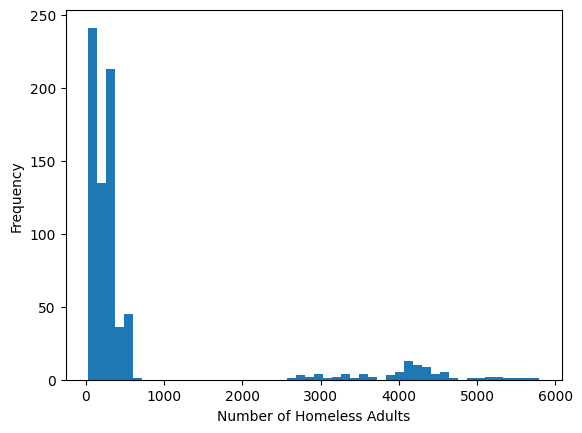

In [468]:
#Histogram to show the frequency of number of homeless adults
plt.hist(vaish_df['Homeless Adults'], bins=50)
plt.xlabel('Number of Homeless Adults')
plt.ylabel('Frequency')
plt.show()

In [39]:
print(vaish_df['DependentChild'].describe())      #summary statistics of the column DependentChild

count     755.000000
mean      332.495364
std       709.700150
min         0.000000
25%        34.000000
50%        74.000000
75%       162.500000
max      2894.000000
Name: DependentChild, dtype: float64


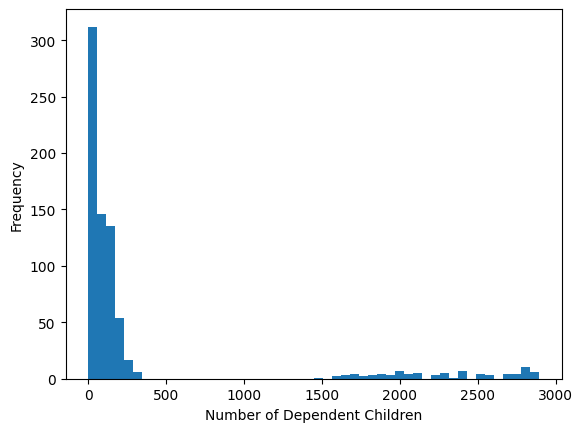

In [40]:
#Histogram to show the frequency of dependent children
plt.hist(vaish_df['DependentChild'], bins=50)
plt.xlabel('Number of Dependent Children')
plt.ylabel('Frequency')
plt.show()

In [42]:
Region_sum = vaish_df.groupby('Region')['Homeless Adults'].sum().reset_index()   #to get the sum of number of homeless adults in each region
print(Region_sum)

       Region  Homeless Adults
0      Dublin         341834.0
1    Mid-East          24596.0
2    Mid-West          26915.0
3    Midlands           7565.0
4  North-East           9751.0
5  North-West           5187.0
6  South-East          21687.0
7  South-West          38241.0
8        West          22134.0


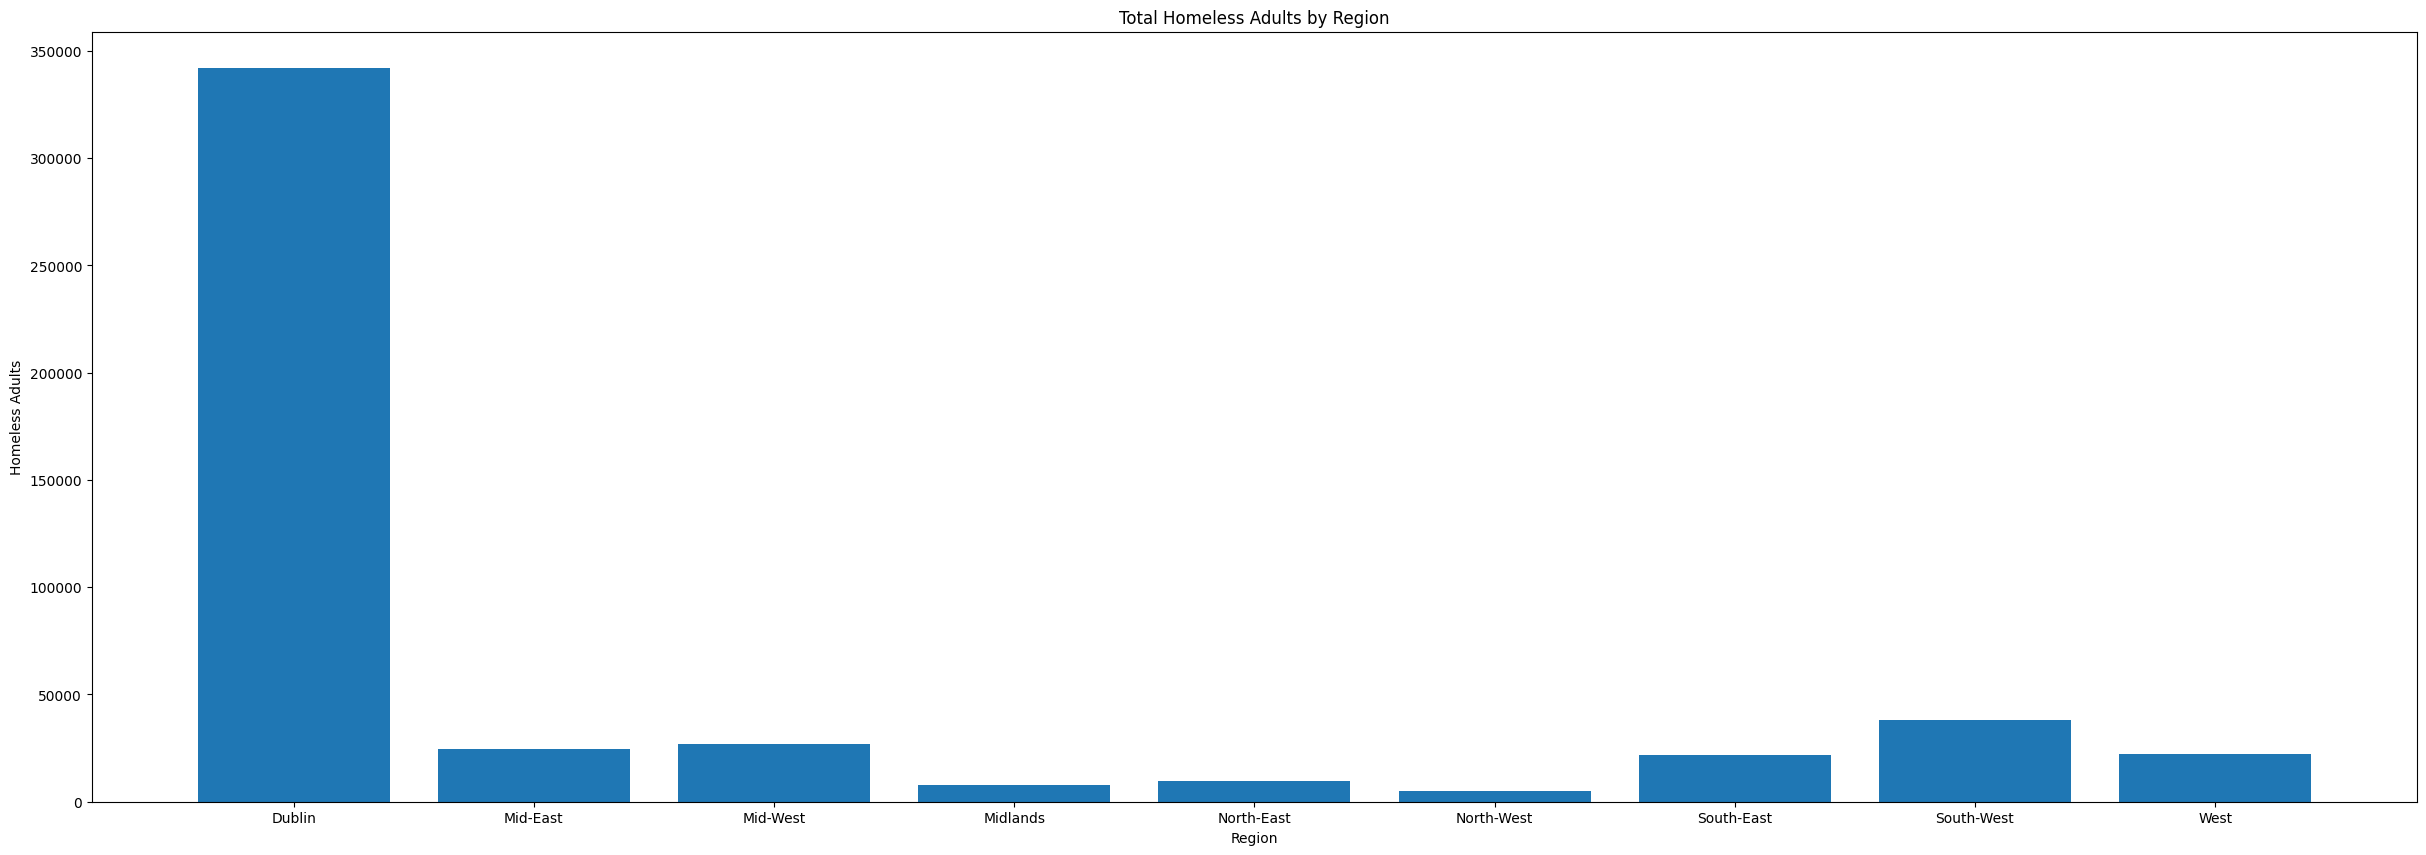

In [43]:
#Bar plot to show the sum of number of homeless adults in each region
fig, ax = plt.subplots(figsize=(30, 10))
plt.bar(Region_sum['Region'], Region_sum['Homeless Adults'])
plt.xlabel('Region')
plt.ylabel('Homeless Adults')
plt.title('Total Homeless Adults by Region')
plt.show()

In [44]:
vaish_df.set_index('Period', inplace=True)  #setting period at index position

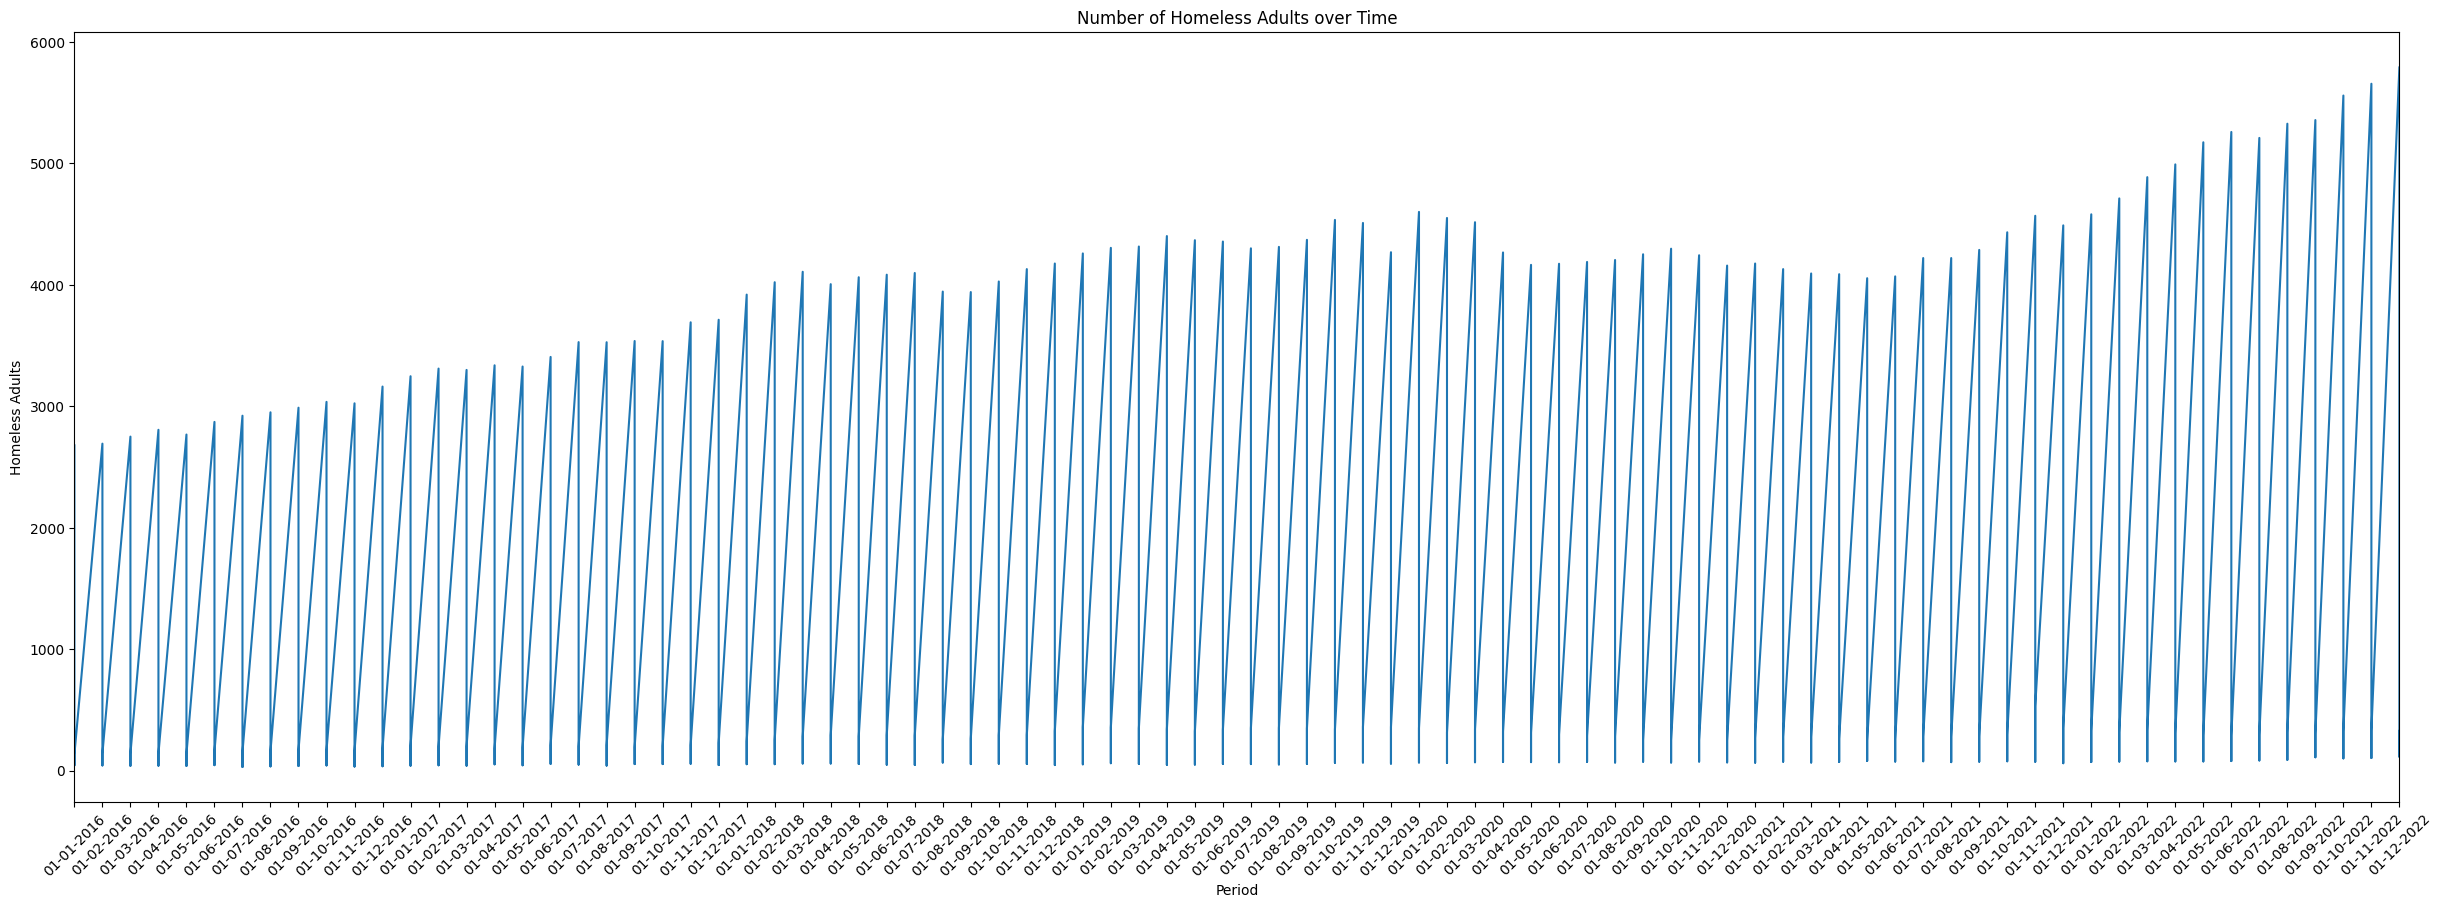

In [48]:
#Time series plot to get homeless adults trend over the years 2016-2022 
fig, ax = plt.subplots(figsize=(30, 10))
plt.plot(vaish_df.index, vaish_df['Homeless Adults'])
plt.xlabel('Period')
plt.ylabel('Homeless Adults')
plt.title('Number of Homeless Adults over Time')
ax.set_xlim(vaish_df.index.min(), vaish_df.index.max())
plt.xticks(rotation=45)
plt.show()

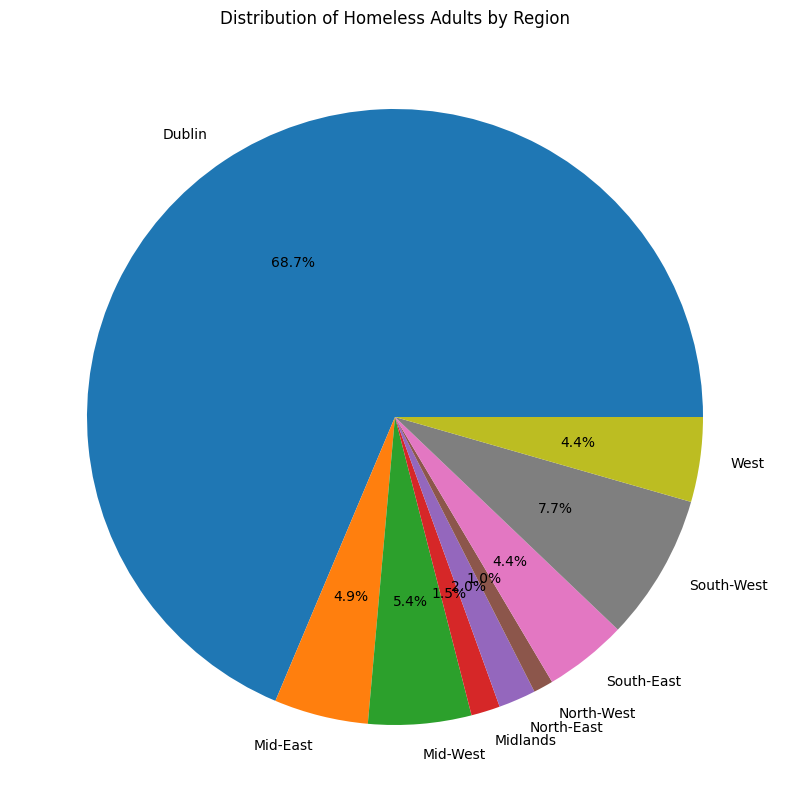

In [46]:
# Creating a pie chart to show the distribution in percentages
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(Region_sum['Homeless Adults'], labels=Region_sum['Region'], autopct='%1.1f%%')
plt.title('Distribution of Homeless Adults by Region')
plt.show()

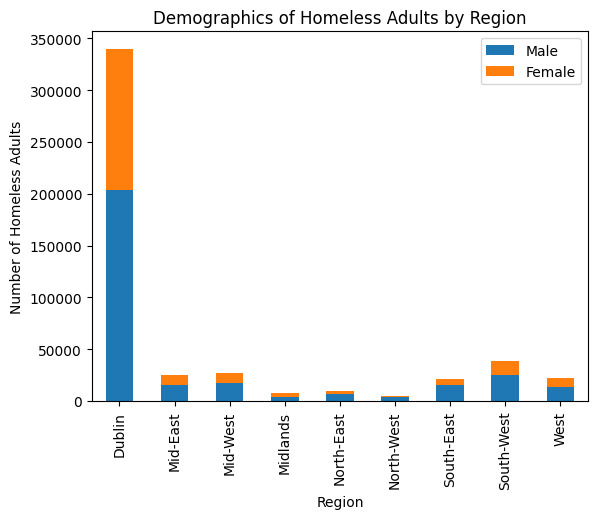

In [49]:
# Grouping the data by region and Gender
region_data = vaish_df.groupby('Region')[['Male', 'Female']].sum()

# Creating a stacked bar chart to show distribution of gender in each region
region_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Number of Homeless Adults')
plt.title('Demographics of Homeless Adults by Region')
plt.show()

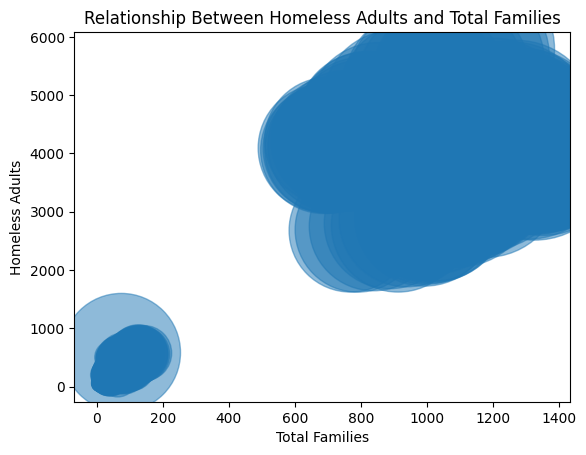

In [50]:
#Scatterplot to show the relationship between homeless adults and total families
plt.scatter(vaish_df['TotalFamilies'], vaish_df['Homeless Adults'], s=vaish_df['DependentChild']*5, alpha=0.5)
plt.xlabel('Total Families')
plt.ylabel('Homeless Adults')
plt.title('Relationship Between Homeless Adults and Total Families')
plt.show()

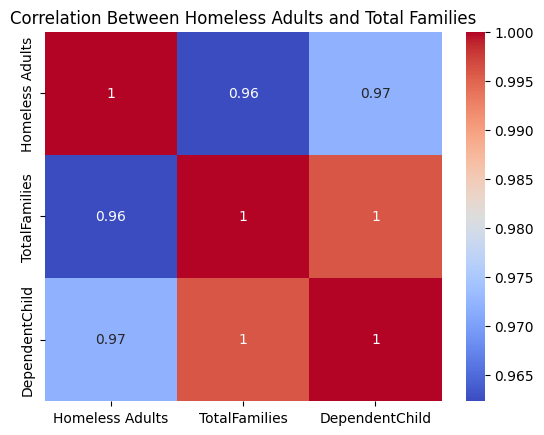

In [51]:
corr_matrix = vaish_df[['Homeless Adults', 'TotalFamilies', 'DependentChild']].corr()    #creating correlation matrix

# Creating a heat map based on the matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Homeless Adults and Total Families')
plt.show()

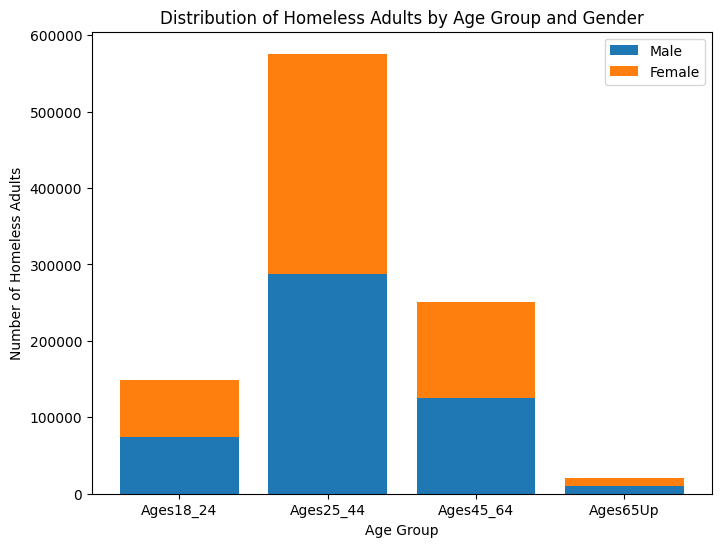

In [52]:
# creating a stacked bar chart showing the distribution of homeless adults by age group and gender
age_groups = ['Ages18_24', 'Ages25_44', 'Ages45_64', 'Ages65Up']
male_counts = vaish_df[age_groups].sum(axis=0)
female_counts = vaish_df[age_groups].sum(axis=0)
plt.figure(figsize=(8, 6))
plt.bar(age_groups, male_counts, label='Male')
plt.bar(age_groups, female_counts, bottom=male_counts, label='Female')
plt.title('Distribution of Homeless Adults by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Homeless Adults')
plt.legend()
plt.show()

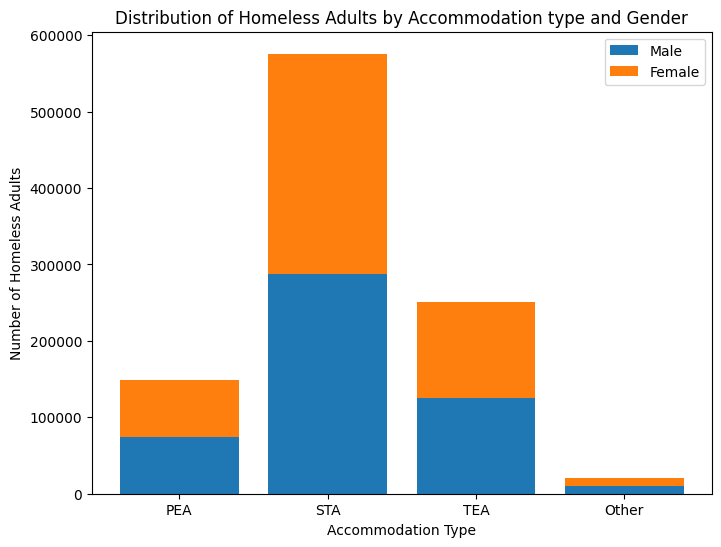

In [54]:
accomodation_type = ['PEA', 'STA', 'TEA', 'Other']
male_counts = vaish_df[age_groups].sum(axis=0)
female_counts = vaish_df[age_groups].sum(axis=0)
plt.figure(figsize=(8, 6))
plt.bar(accomodation_type, male_counts, label='Male')
plt.bar(accomodation_type, female_counts, bottom=male_counts, label='Female')
plt.title('Distribution of Homeless Adults by Accommodation type and Gender')
plt.xlabel('Accommodation Type')
plt.ylabel('Number of Homeless Adults')
plt.legend()

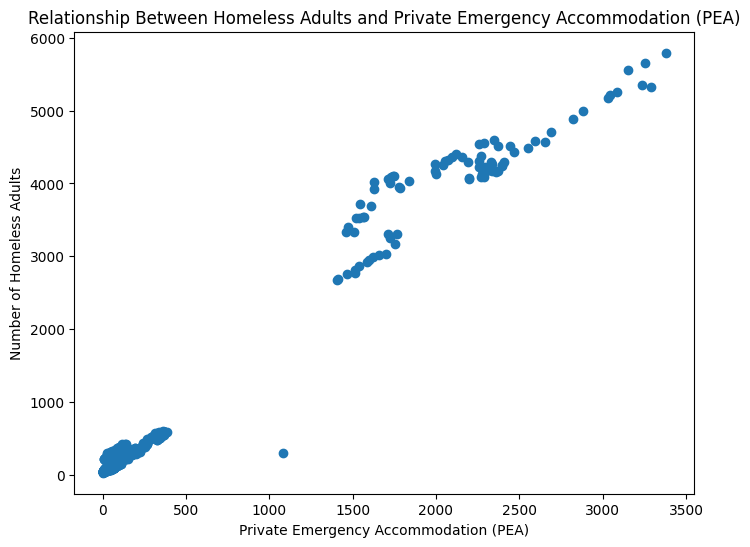

In [55]:
# create a scatter plot showing the relationship between the number of homeless adults and the number of people in employment (PEA) in each region
plt.figure(figsize=(8, 6))
plt.scatter(vaish_df['PEA'], vaish_df['Homeless Adults'])
plt.title('Relationship Between Homeless Adults and Private Emergency Accommodation (PEA)')
plt.xlabel('Private Emergency Accommodation (PEA)')
plt.ylabel('Number of Homeless Adults')
plt.show()

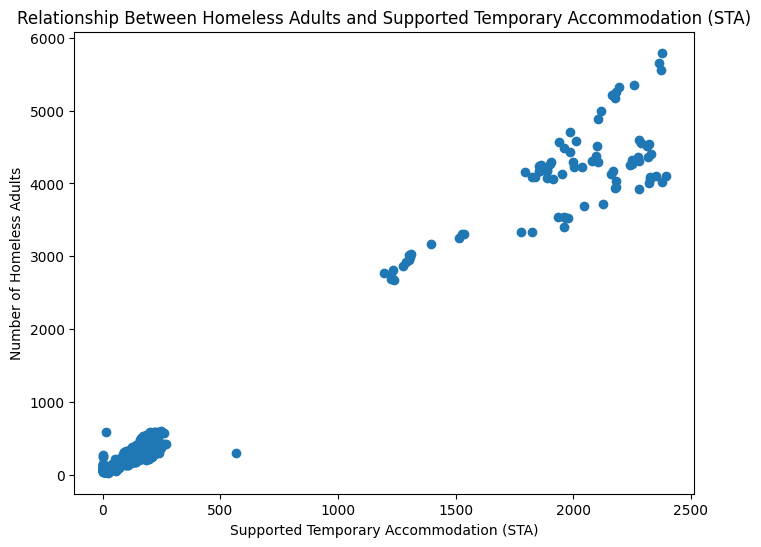

In [56]:
# create a scatter plot showing the relationship between the number of homeless adults and the number of people in employment (PEA) in each region
plt.figure(figsize=(8, 6))
plt.scatter(vaish_df['STA'], vaish_df['Homeless Adults'])
plt.title('Relationship Between Homeless Adults and Supported Temporary Accommodation (STA)')
plt.xlabel('Supported Temporary Accommodation (STA)')
plt.ylabel('Number of Homeless Adults')
plt.show()

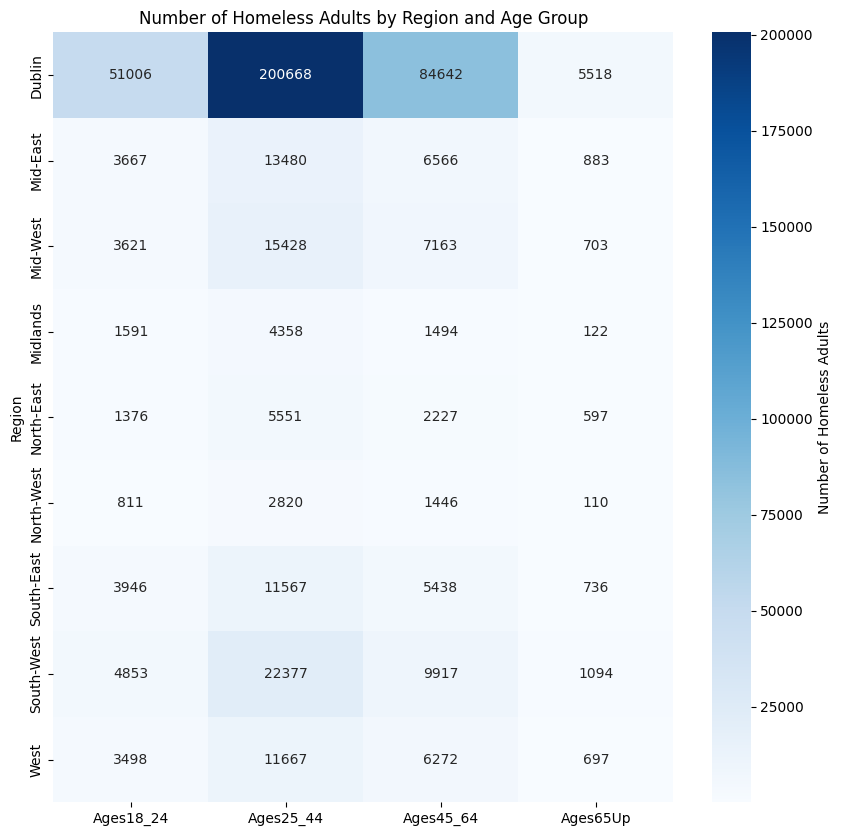

In [57]:
# creating a heatmap to show relationship between homeless adults, age group and region
table = vaish_df.pivot_table(index='Region', values=['Ages18_24', 'Ages25_44', 'Ages45_64', 'Ages65Up'], aggfunc='sum')
plt.figure(figsize=(10, 10)) #figure size
sns.heatmap(table, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Homeless Adults'})   #parameters
plt.title('Number of Homeless Adults by Region and Age Group')
plt.show()

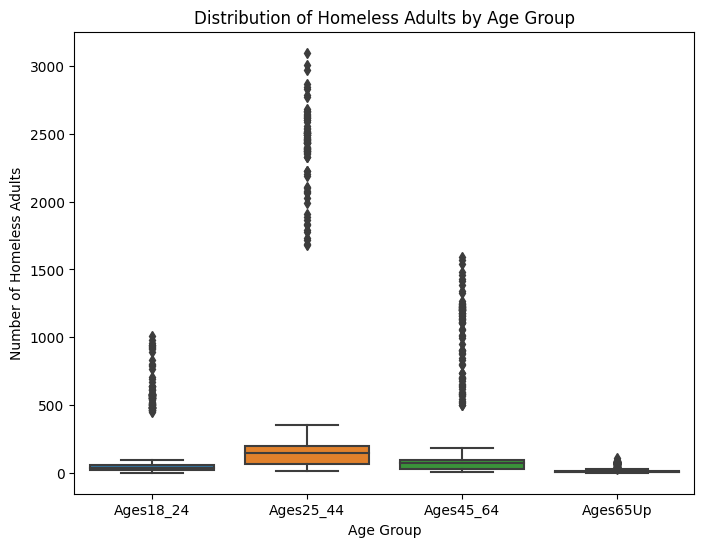

In [58]:
#distribution of the number of homeless adults by age group across all regions
plt.figure(figsize=(8, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(vaish_df[['Ages18_24', 'Ages25_44', 'Ages45_64', 'Ages65Up']]))
plt.title('Distribution of Homeless Adults by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Homeless Adults')
plt.show()

In [60]:
geocoder = opencage.geocoder.OpenCageGeocode("cea609a0d1f44c91b69dc1e413afb033")  # Setting up the geocoder with my API key using opencage

# getting the latitude/longitude coordinates for each region
for index, row in vaish_df.iterrows():
    address = f"{row['Region']}, Ireland"
    result = geocoder.geocode(address)   # Call the geocoder API to look up the coordinates
    if len(result) > 0:    # Extract the latitude/longitude coordinates from the result
        lat = result[0]['geometry']['lat'] 
        lng = result[0]['geometry']['lng']
        vaish_df.at[index, 'Latitude'] = lat    # Add the coordinates to the DataFrame
        vaish_df.at[index, 'Longitude'] = lng

vaish_df.to_csv('C:/Users/vaish/Downloads/data_with_coords.csv', index=False)     # Saving the updated DataFrame to a CSV file

PermissionError: [Errno 13] Permission denied: 'C:/Users/vaish/Downloads/data_with_coords.csv'

In [63]:
new_vaish_df = pd.read_csv('C:/Users/vaish/Downloads/data_with_coords.csv')    # Loading the new data into a Pandas DataFrame

map = folium.Map(location=[53.1424, -7.6921], zoom_start=7)  # Creating a map centered on Ireland

# Adding markers for each region
for index, row in new_vaish_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=f"{row['Region']}: {row['Homeless Adults']}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(map)

map    # Display the map

In [64]:
region_data = vaish_df.groupby('Region')['Homeless Adults'].sum().reset_index()

# Creating a choropleth map
fig = px.choropleth(region_data, locations='Region', color='Homeless Adults',
                    range_color=(0, 5000), scope='europe')
fig.update_layout(title_text='Geographic Distribution of Homeless Adults in Ireland')
fig.show()

In [71]:
# creating an interactive scatter plot using Plotly
fig = px.scatter(vaish_df, x='Other', y='Homeless Adults', color='Region', hover_name='Region')
fig.update_layout(title='Relationship Between Homeless Adults and Accommodation type (OTHER)',
                  xaxis_title='Number of People accessing other accommodation',
                  yaxis_title='Number of Homeless Adults')
fig.show()